# Burgers equation and up-wind

Solution of Burgers equation via standard up-wind

\begin{align}
u(t+\tau,x_i) = u(t,x_i) - \frac{\tau}{h} \left\{F(u(t,x_i))-F((u(t,x_{i-1}))\right\},
\end{align}

with flux $F(u)=\tfrac12 u^2$ and we identify periodically $u(t,x)=u(t,x+L)$ with mesh point $x_i=ih$ and $h=L/N$ for $i=0,...,N-1$.

Questions:

1. Compare the discretization with up-wind b) with the other variants a) and c).
2. What do you expect from an implicit discretization?
3. What is the speed of the discontinuity?
4. How big can you make the time-step size?

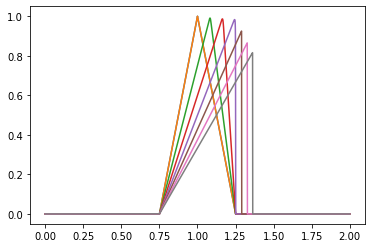

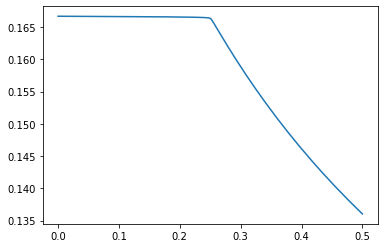

In [6]:
import numpy as np
from matplotlib import pyplot as plt

L       = 2.0
npoint  = 32*512
T       = 0.25*2
n_steps = 2*npoint
t       = 0.0                     
dt      = T/(n_steps)

x = np.linspace(0,L,npoint)
x = x[:-1]
u = np.maximum(1-4*abs(x-1),0)

state    = []
h        = x[2]-x[1]
slice    = np.array(range(-1,npoint-2));
slice[0] = npoint-2

def flux(u):
    return 0.5*u*u

plt.plot(x,u)
for it in range(n_steps+1):
     t += dt
     u -= dt*(flux(u)-flux(u[slice]))/h
     if (it % round(n_steps/6) == 0):
        plt.plot(x,u)
        
     f  = u*u
     fh = ( f[1:] + f[:-1])/2
     dx = ( x[1:] - x[:-1])
     intf  = np.sum(fh*dx)  
     state.append([t,intf])

times    = np.array(state).T[0]
f        = np.array(state).T[1]
plt.figure()
plt.plot(times,f)